# Wizualizacja danych

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
#%matplotlib inline

# Wczytaj dane z pliku

In [3]:
inFile = 'babyboom.dat.txt'
data = pd.read_csv(inFile, sep='[ ]+', header=None, engine='python',names= ['sex', 'Weight', 'Minutes'])
df = data[['Minutes', 'sex', 'Weight']]

In [4]:
df.head()

,Minutes,sex,Weight
5,5,1,3837
104,64,1,3334
118,78,2,3554
155,115,2,3838
257,177,2,3625


# Narysujmy dane <tt>df.Weight.values</tt> jako szereg czasowy

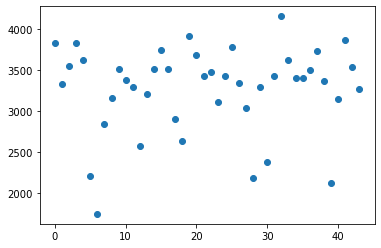

In [5]:
x=df.Weight.values
plt.scatter(np.arange(len(x)), x)
plt.show()

# Narysujmy histogram dla <tt>df.Weight.values</tt>

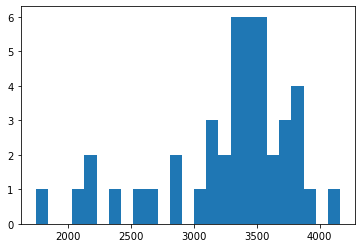

In [6]:
plt.hist(x, bins=25)
plt.show()

# Narysujmy gęstość dla <tt> df.Weight.values</tt> (estymacja jądrowa):

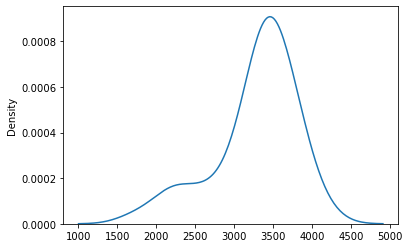

In [7]:
sns.kdeplot(x)
plt.show()

# Narysujmy dystrybuantę empiryczną dla </tt> df.Weight.values<tt>

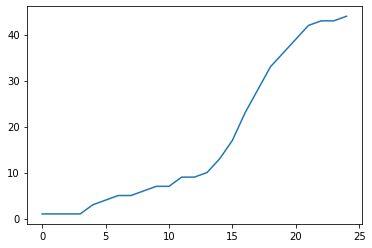

In [8]:
plt.plot(stats.cumfreq(x,numbins=25)[0])
plt.show()

# Narysujmy wykres pudełkowy dla <tt>df.Weight.values</tt>

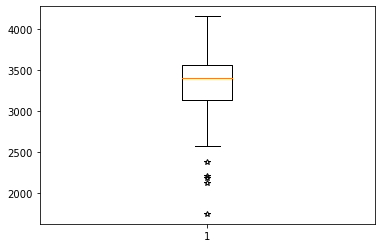

In [9]:
plt.boxplot(x, sym='*')
plt.show()

# Narysujmy wykres skrzypcowy dla <tt>df.Weight.values</tt>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


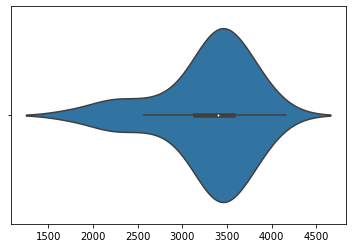

In [10]:
sns.violinplot(x)
plt.show()

# Zadanie
Proszę podzielić próbkę na dwie grupy ze względu na płeć (kolumna ``sex'') i narysować dla nich:
<ul>
<li>wykres w kształcie szeregu czasowego</li>
<li>histogramy</li>
<li>estymacje gęstości</li>
<li>dystrybuanty empiryczne</li>
<li>wykresy pudełkowe</li>
<li>wykresy skrzypcowe</li>
</ul>

In [11]:
# To make the plots easier to read, replace "1/2" with "female/male"
df.sex = df.sex.replace([1,2], ['female', 'male'])

In [12]:
# Display statistical information numerically
grouped = df.groupby('sex')
print(grouped.describe())
print(grouped.get_group('male').Weight.head())
print(grouped.get_group('female').Weight.head())

       Minutes                                                                \
         count        mean         std   min     25%    50%      75%     max   
sex                                                                            
female    18.0  773.000000  446.050775   5.0  507.75  846.5  1094.25  1435.0   
male      26.0  799.615385  402.687281  78.0  464.25  849.5  1177.50  1283.0   

       Weight                                                            \
        count         mean         std     min     25%     50%      75%   
sex                                                                       
female   18.0  3132.444444  631.582534  1745.0  2711.0  3381.0  3517.25   
male     26.0  3375.307692  428.046051  2121.0  3198.0  3404.0  3628.75   

                
           max  
sex             
female  3866.0  
male    4162.0  
118    3554
155    3838
257    3625
422    2846
431    3166
Name: Weight, dtype: int64
5      3837
104    3334
405    2208
407    1745
814

# wykres w kształcie "szeregu czasowego"

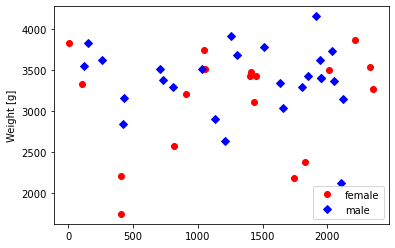

In [13]:
# This is a bit fancier: scatter plots, with labels and individual symbols
symbols = ['o', 'D']
colors = ['r', 'b']
fig = plt.figure()
ax = fig.add_subplot(111)
# "enumerate" provides a counter, and variables can be assigned names in one step if
# the "for"-loop uses a tuple as input for each loop:
for (ii, (sex, group)) in enumerate(grouped):
    ax.plot(group['Weight'], marker = symbols[ii], linewidth=0, color = colors[ii], label=sex)
ax.legend()
ax.set_ylabel('Weight [g]')
plt.show()

# estymacje gęstości

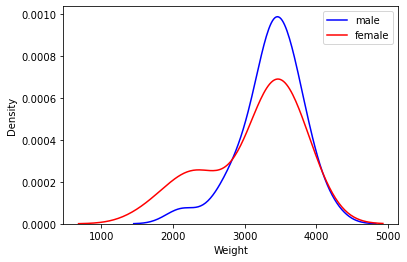

In [14]:
# Fancy finish: a kde-plot
df.Weight = np.double(df.Weight) # kdeplot requires doubles

sns.kdeplot(grouped.get_group('male').Weight, color='b', label='male')
sns.kdeplot(grouped.get_group('female').Weight, color='r', label='female')
plt.legend()
plt.show()

# histogramy

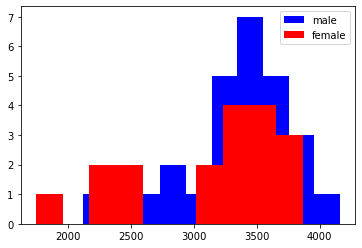

In [15]:
# Fancy finish: a kde-plot
df.Weight = np.double(df.Weight) # kdeplot requires doubles
plt.hist(grouped.get_group('male').Weight, color='b', label='male')
plt.hist(grouped.get_group('female').Weight, color='r', label='female')
plt.legend()
plt.show()

# dystrybuanty empiryczne

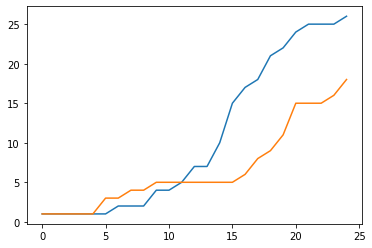

In [28]:
plt.plot(stats.cumfreq(grouped.get_group('male').Weight,numbins=25)[0])
plt.plot(stats.cumfreq(grouped.get_group('female').Weight,numbins=25)[0])
plt.show()

# wykresy pudełkowe

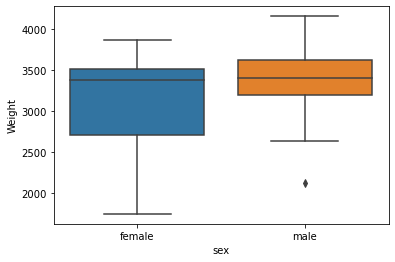

In [29]:
sns.boxplot(x="sex",y="Weight",data=df)
plt.show()

# wykresy skrzypcowe

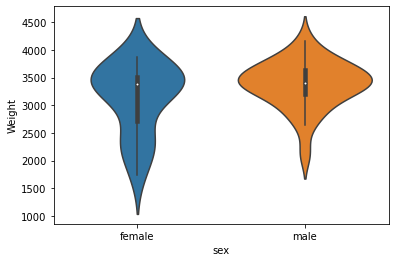

In [30]:
sns.violinplot(x="sex",y="Weight",data=df)
plt.show()

# Test: czy próbka pochodzi z rozkładu normalnego 

In [32]:
# Statistics: are the data normally distributed?
def isNormal(data, dataType):
    '''Check if the data are normally distributed'''
    alpha = 0.05
    (k2, pVal) = stats.normaltest(data)
    if pVal < alpha:
        print('{0} are NOT normally distributed.'.format(dataType))
    else:
        print('{0} are normally distributed.'.format(dataType))

In [33]:
isNormal(grouped.get_group('male').Weight, 'male')
isNormal(grouped.get_group('female').Weight, 'female')

male are NOT normally distributed.
female are normally distributed.


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
